## <font color = "#CC3D3D">Case #1: Corner detection</font>

<hr>

### Features of corner
<hr>

- 영상에서 특징(feature)이란 영상으로부터 추출할 수 있는 유용한 정보를 의미하며 평균 밝기, 히스토그램, 에지,<br>
직선 성분, 코너 등이 특징이 될 수 있다. 영상의 특징 중에서 에지, 직선 성분, 코너처럼 영상 전체가 아닌 일부 영역에서<br>
추출할 수 있는 특징을 지역 특징(local feature)이라고 한다.

<hr>

- 코너(corner)의 특징
    - 보통 평탄한 영역(flat) & 에지(edge) 영역은 고유한 위치를 찾기 어렵다. 그러나 코너는 에지의 방향이<br>
    급격하게 변하는 부분으로서 삼각형의 꼭지점이나 연필 심처럼 뾰족하게 튀어나와 있는 부분이 코너가 될 수 있다.
    - 코너는 에지나 직선 성분 등의 다른 지역 특징에 비해 변별력이 높고 대체로 영상 전 영역에 골고루 분포하기<br>
    때문에 영상을 분석하는 데 유용한 지역 특징으로 사용된다.
        - 참고로 코너처럼 한 점의 형태로 표현할 수 있는 특징을 특징점(feature point)이라고 하며,<br>
        특징점은 키포인트(keypoint) 또는 관심점(interest point)이라고 부르기도 한다.
        - 영상의 이동, 회전 변환에 강인하다는 특징 또한 있다.
    - 아래 영상은 코너 특징점의 변별력을 가늠하기 위한 예시이다.
    - <img src="images/markdown/corner.png" width="600">
    - 오른쪽에 나타난 A, B, C 부분 영상은 왼쪽 원본 영상에서 추출한 부분 영상이다.
    - A 부분 영상은 내부 픽셀 값 변화가 크지 않은 평탄한 영역이며, 원본 영상에서 하늘 영역 전체는 모두 A와<br>
    비슷한 픽셀 값 분포를 가진다.
    - B 부분 영상은 하늘과 바다가 만나는 수평선 부근에서 추출되었다는 것을 쉽게 알아차릴 수 있지만, 정확한<br>
    x 좌표는 가늠하기 어렵다.
    - 반면에 C 부분 영상은 특정 건물이 뾰족하게 튀어나와 있는 부분 영상이며, 원본 영상 오른쪽 산등성이에서<br>
    유일한 위치를 찾을 수 있다.
    - C 부분 영상에서 뾰족하게 튀어나와 있는 건물이 영상에서 코너 역할을 하며, 코너는 에지나 평탄한 영역에 비해<br>
    변별력이 높아서 그 위치를 파악하기 수월하다.

<hr>

### Step #1: Method
<hr>

- 해리스(Harris) 코너 검출

<hr>

### Step #2: OpenCV function
<hr>

good features to track - 코너 점들의 좌표를 그대로 반환하기 때문에 사용하기에 좀 더 편리하다는 장점이 있다.

In [ ]:
$$\mathsf{{\color{RoyalBlue} }{\color{Tan} }()\rightarrow }$$
- <img src="images/markdown/.png" width="600">

<hr>

### Step #3: Implementation example
<hr>

In [73]:
# GFTT & FAST corner detection example
import sys

import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/building.jpg", cv2.IMREAD_GRAYSCALE)

# 예외 처리
if source is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


reset point

In [84]:
# GFTT와 FAST 알고리즘의 속도 비교를 위해 연산 속도 측정
tm = cv2.TickMeter()

In [85]:
# GFTT(Good Features to Track)
tm.start()
corners = cv2.goodFeaturesToTrack(source, 400, 0.01, 10)  # corners = (N, 1, 2)
tm.stop()

# GFTT 결과 영상 생성
destination1 = cv2.cvtColor(source, cv2.COLOR_GRAY2BGR)

# 연산 속도 표시
input_text = str(round(tm.getTimeMilli(), 4)) + "ms"
destination1 = cv2.putText(
    destination1, input_text, (0, source.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, (0, 255, 0), 2, cv2.LINE_AA
    )

# 검출된 코너 좌표에 원 그리기
for corner in corners:
    point = (int(corner[0, 0]), int(corner[0, 1]))
    destination1 = cv2.circle(destination1, point, 5, (0, 0, 255), 1, cv2.LINE_AA)

In [86]:
tm.reset()  # 앞서 측정한 시간을 초기화

In [87]:
# FAST(Features from Accelerated Segment Test)
FAST = cv2.FastFeatureDetector_create(60)
tm.start()
keypoints = FAST.detect(source)
tm.stop()

# FAST 결과 영상 생성
destination2 = cv2.cvtColor(source, cv2.COLOR_GRAY2BGR)

# 연산 속도 표시
input_text = str(round(tm.getTimeMilli(), 4)) + "ms"
destination2 = cv2.putText(
    destination2, input_text, (0, source.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX,
    1.2, (0, 255, 0), 2, cv2.LINE_AA
    )

# 검출된 코너 좌표에 원 그리기
for key in keypoints:
    point = (int(key.pt[0]), int(key.pt[1]))
    destination2 = cv2.circle(destination2, point, 5, (0, 0, 255), 1, cv2.LINE_AA)

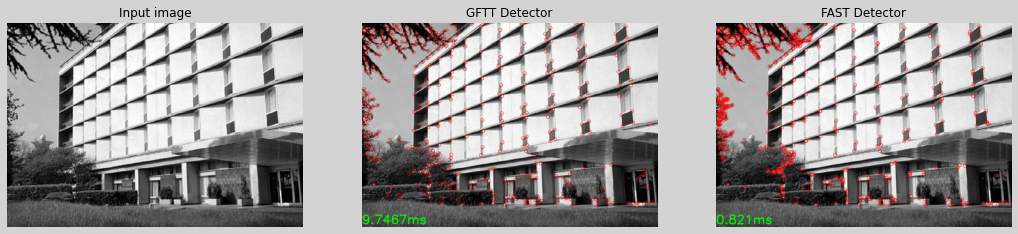

In [88]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")

plt.subplot(131, title="Input image").axis("off")
plt.imshow(source, "gray")

plt.subplot(132, title="GFTT Detector").axis("off")
plt.imshow(destination1[..., ::-1])

plt.subplot(133, title="FAST Detector").axis("off")
plt.imshow(destination2[..., ::-1])

plt.show()

In [53]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Input image", source)
cv2.imshow("GFTT Detector", destination1)
cv2.imshow("FAST Detector", destination2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## <font color = "#CC3D3D">Case #2: Feature point techniques</font>

<hr>

### Step #1: Feature point detection
<hr>

In [89]:
# Feature detection example
import sys

import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("images/graf1.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/graf3.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


reset point

In [150]:
# 특징점 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
# instance = cv2.SIFT_create()
# instance = cv2.KAZE_create()
# instance = cv2.AKAZE_create()
instance = cv2.ORB_create(1000)  # nfeatures=500(default)

In [151]:
# 특징점 검출
keypoints1 = instance.detect(source1)
keypoints2 = instance.detect(source2)

In [152]:
# 검출된 특징점 개수
print("keypoints of 1st source: ", len(keypoints1))
print("keypoints of 2nd source: ", len(keypoints2))

keypoints of 1st source:  1000
keypoints of 2nd source:  1000


In [153]:
# 검출된 특징점 결과 영상 생성
destination1 = cv2.drawKeypoints(
    source1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
destination2 = cv2.drawKeypoints(
    source2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

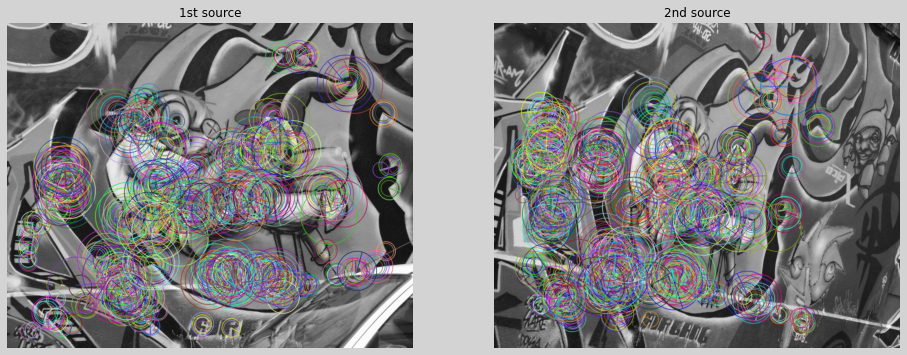

In [154]:
# 결과 영상 출력(pyplot)
plt.figure(figsize=(16, 6), facecolor="lightgray")

plt.subplot(121, title="1st source").axis("off")
plt.imshow(destination1, "gray")

plt.subplot(122, title="2nd source").axis("off")
plt.imshow(destination2, "gray")

plt.show()

In [109]:
# 결과 영상 출력(OpenCV 가상 윈도우)
cv2.imshow("1st source", destination1)
cv2.imshow("2nd source", destination2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<hr>

### Step #2: Feature point description
<hr>

In [126]:
# Feature point descriptor example
import sys

import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("images/graf1.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/graf3.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


In [147]:
# 특징점 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
# instance = cv2.SIFT_create()
# instance = cv2.KAZE_create()
# instance = cv2.AKAZE_create()
instance = cv2.ORB_create()  # nfeatures=500(default)

In [148]:
# 특징점 검출 및 기술자 생성
keypoints1 = instance.detect(source1)
_, descriptor1 = instance.compute(source1, keypoints1)

keypoints2, descriptor2 = instance.detectAndCompute(source2, None)

In [149]:
# 기술자 정보(실수 or 이진)
print("descriptor1.shape: ", descriptor1.shape)
print("descriptor1.dtype: ", descriptor1.dtype)
print("descriptor2.shape: ", descriptor2.shape)
print("descriptor2.dtype: ", descriptor2.dtype)

descriptor1.shape:  (500, 32)
descriptor1.dtype:  uint8
descriptor2.shape:  (500, 32)
descriptor2.dtype:  uint8


<hr>

### Step #3: Feature point matching
<hr>

In [155]:
# Feature point matching example
import sys

import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("images/graf1.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/graf3.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

Image load succeed!


In [184]:
# 특징점 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
instance = cv2.SIFT_create(1000)
# instance = cv2.KAZE_create()
# instance = cv2.AKAZE_create()
# instance = cv2.ORB_create()  # nfeatures=500(default)

In [185]:
# 특징점 검출 및 기술자 생성
keypoints1, descriptors1 = instance.detectAndCompute(source1, None)
keypoints2, descriptors2 = instance.detectAndCompute(source2, None)

In [186]:
# 검출된 특징점 매칭
matcher = cv2.BFMatcher_create()
# matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

matches = matcher.match(descriptors1, descriptors2)

In [187]:
# 검출된 특징점 개수와 매칭점 개수
print("keypoints of 1st source: ", len(keypoints1))
print("keypoints of 2nd source: ", len(keypoints2))
print("matches of 1st source to 2nd: ", len(matches))

keypoints of 1st source:  1000
keypoints of 2nd source:  1000
matches of 1st source to 2nd:  1000


In [188]:
destination = cv2.drawMatches(source1, keypoints1, source2, keypoints2, matches, None)

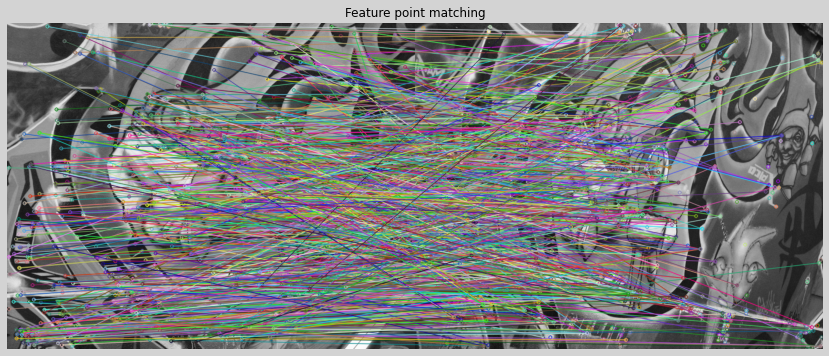

In [190]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")
plt.title("Feature point matching")
plt.imshow(destination, "gray")
plt.axis("off")
plt.show()

In [175]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("feature point matching", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<hr>

### Step #4: Good matching selection
<hr>

In [ ]:
# Good matching selection example
import sys

import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("images/graf1.png", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("images/graf3.png", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()
else:
    print("Image load succeed!")

In [ ]:
# 특징점 알고리즘 객체 생성(SIFT, KAZE, AKAZE, ORB)
instance = cv2.SIFT_create(1000)
# instance = cv2.KAZE_create()
# instance = cv2.AKAZE_create()
# instance = cv2.ORB_create()  # nfeatures=500(default)

In [ ]:
# 특징점 검출 및 기술자 생성
keypoints1, descriptors1 = instance.detectAndCompute(source1, None)
keypoints2, descriptors2 = instance.detectAndCompute(source2, None)

In [ ]:
# 검출된 특징점 매칭
matcher = cv2.BFMatcher_create()
# matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

matches = matcher.match(descriptors1, descriptors2)

## <font color = "#CC3D3D">Case #3: Homography</font>

## <font color = "#CC3D3D">Case #4: Image stitching</font>

## <font color = "#CC3D3D">Training #1: AR video player</font>